# Heart Diseases Prediction:
    
1.Problem Description :

A dataset is formed by taking into consideration some of the information of 779 individuals. The problem is : based on the given information about each individual we have to calculate that whether that individual will suffer from heart disease.

In [2]:
#Importing Libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#import warnings:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the Dataset:
df = pd.read_csv('Heartdiseases.csv')
print(df.shape) #checking no of rows and columns in the dataset.
df.head()

(302, 14)


,63.0,1.0,1.0.1,145.0,233.0,1.0.2,2.0,150.0,0.0,2.3,3.0,0.0.1,6.0,0
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [4]:
#Renaming Columns:
column_labels = ['age','Sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target']

In [5]:
df.columns = column_labels

In [6]:
df.head()

,age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [7]:
#Checking datatypes:
df.dtypes

age         float64
Sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [8]:
#Checking for categorical columns:
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)
print("Categorical Columns:",cat_col)

Categorical Columns: ['ca', 'thal']


In [17]:
#converting categorical variable to neumeric format:
df['thal'] = pd.to_numeric(df['thal'],errors='coerce')  
df['ca'] = pd.to_numeric(df['ca'],errors='coerce')  

          Total Missing Value
age                         0
Sex                         0
cp                          0
trestbps                    0
chol                        0
fbs                         0
restecg                     0
thalach                     0
exang                       0
oldpeak                     0
slope                       0
ca                          4
thal                        2
target                      0


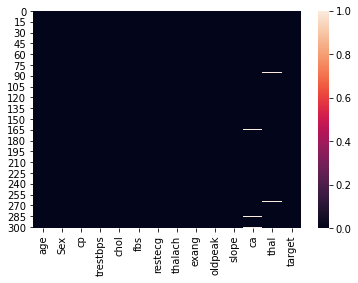

In [21]:
#Checking the null values in the dataset:
missing_value = pd.DataFrame(df.isnull().sum(),columns=['Total Missing Value'])
print(missing_value)
sns.heatmap(df.isnull())

In [22]:
#Normalizing the missing value:
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

In [24]:
#Checking again for null values:
df.isnull().values.any()

False

Statistical Analysis:

In [25]:
#Doing Statistical Analysis by using Describe Function
#Checking interquantile range.
#Checking mean median mode
df.describe()

,age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.410596,0.678808,3.165563,131.645695,246.738411,0.145695,0.986755,149.605960,0.327815,1.035430,1.596026,0.674497,4.730000,0.940397
std,9.040163,0.467709,0.953612,17.612202,51.856829,0.353386,0.994916,22.912959,0.470196,1.160723,0.611939,0.931947,1.935102,1.229384
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,55.500000,1.000000,3.000000,130.000000,241.500000,0.000000,0.500000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [26]:
#Avg age of people considered for having heart disease is around 54
#in chol,trestbps column mean is greater than the median hence possibility of outliers exists.

Feature Engineering:

In [28]:
# Converting the target varibale into binary format by using map function:
target = {0: 0, 1: 1, 2: 1, 3: 1, 4: 1}
df['target'] = df['target'].map(target)

In [30]:
#Conerting the Sex column in proper format:
df['Sex'] = df['Sex'].map({0: 'female', 1: 'male'})

In [57]:
#Converting them binary format:
df['Sex'] = df.Sex.map({'female': 0, 'male': 1})

In [31]:
df.shape

(302, 14)


Exploratory Data Analysis

1.Univarite Analysis

2.Multivariate Analysis

3.Bivariate Analysis

4.Here we check the relationship between different independant and dependant variable.

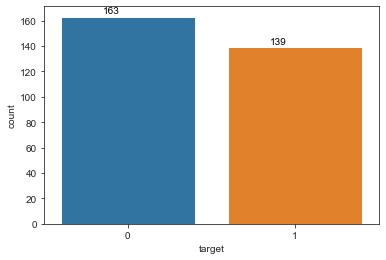

In [32]:
#Univariate Analysis:
#Checking Count of Target Varibale:
sns.set_style('ticks')
ax = sns.countplot(df['target'])
for p in ax.patches:
       ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom',color= 'black')

Observation: Out of 320 peoples 163 have Heart diseses and 139 dont have heart diseases.

Text(0.5, 1.0, 'Avg age Distribution')

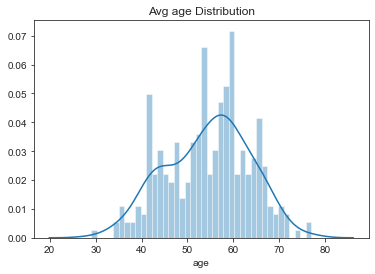

In [49]:
#Univariate Analysis:
#Checking dustribution of age:
sns.set_style('ticks')
sns.distplot(df['age'],bins=40)
plt.title('Avg age Distribution')

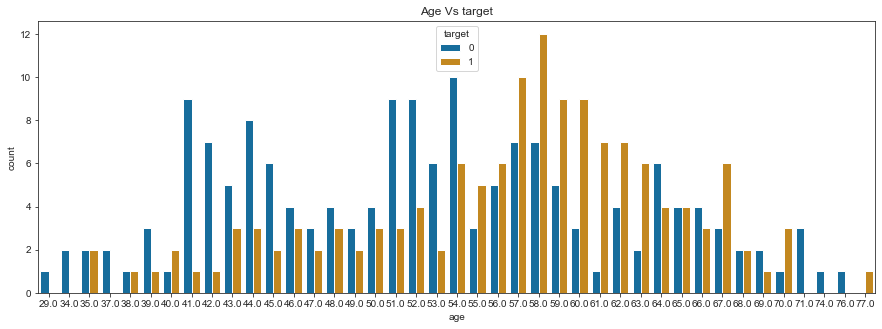

In [34]:
#Bivariate Analysis:
#Checking the realationship between target and Age:
plt.subplots(figsize=(15,5))
plt.title('Age Vs target')
sns.countplot(x='age',hue='target',data=df,palette='colorblind')

Observation: we can clearly see people with age group between 54 to 60 have maximum no of heart diseases.

<Figure size 360x360 with 0 Axes>

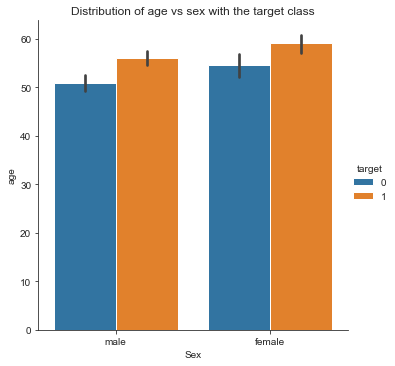

In [40]:
#Bivariate Analysis:
#Checking the realationship between sex and Age with hue target:
plt.figure(figsize=(5,5))
sns.catplot(y = 'age', x = 'Sex', hue = 'target', data=df, kind ='bar')
plt.title('Distribution of age vs sex with the target class')
plt.show()

Observation: Female are more prone to get heart diseases compared to male.

In [51]:
#Checking the coerelation:
#how the different neumerical features are corelated to each other 
#Their strength of relationship
#Their influence on target variable.

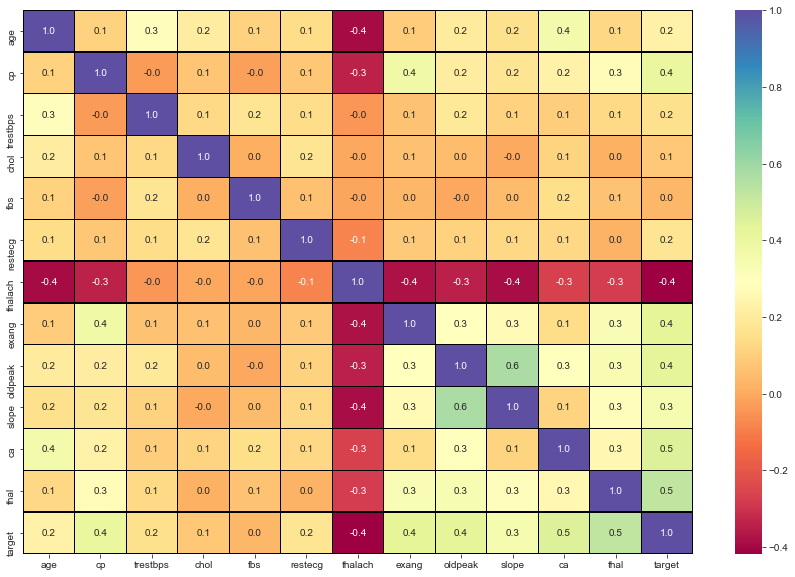

In [52]:
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,fmt=".1f",linewidths=.2,cmap="Spectral",ax=ax,linecolor="black")
plt.show()

Observations:Area under ligther region are highly positively corelated and area under darker region are highly negatively corelated.

In [53]:
#Checking for skewness:
#whether the features are right or left skewed.
#for right and left skewed we can use logarthim transformation.
#if the skewness value is greater than o.55 then the features are skewed.

In [59]:
df.skew()

age        -0.203026
Sex        -0.769709
cp         -0.845849
trestbps    0.713008
chol        1.131463
fbs         2.018566
restecg     0.026623
thalach    -0.536399
exang       0.737281
oldpeak     1.281701
slope       0.503687
ca          1.192300
thal        0.251022
target      0.160242
dtype: float64

In [60]:
import scipy.stats as stat
import pylab

In [61]:
#If you want to check whether feature is guassian or normal distributed
# Q-Q plot is used to check wheather the data are normally distributed or not by graphically.
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

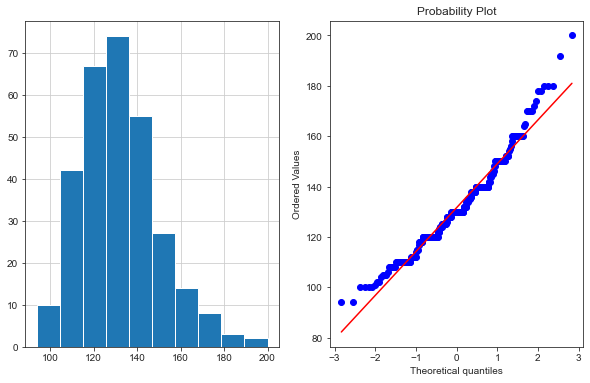

In [64]:
plot_data(df,'trestbps')

In [65]:
# We can clearly see data points are not been normally distributed.

In [66]:
for col in df.columns:
    if col!= 'target':
        if df.skew().loc[col]>0.55:
            df[col] = np.log1p(df[col])

In [67]:
#Checking for outliers
#outlier is a data point that differs significantly from other observations. 
#Any datapoint greater than +3 Standard Deviations and -3 SD are called Outliers
#Zscore is Automated method used to handle outliers.

In [68]:
#Let check wheather any outliers are present or not
from scipy.stats import zscore
zscore = abs(zscore(df))
print("Before removal of outliers:",df.shape)
df_final = df.loc[(zscore<3).all(axis=1)]
print("After removal of outliers:",df_final.shape)

Before removal of outliers: (302, 14)
After removal of outliers: (297, 14)


In [69]:
#Let Separate the input and output variable:
#Let select input and output value:
X = df_final.drop('target',axis=1)
y = df_final['target']
print('shape of X is {}'.format(X.shape))
print('shape of y is {}'.format(y.shape))

shape of X is (297, 13)
shape of y is (297,)


In [70]:
#Breaking the model into training and testing split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [71]:
#Using StandardScaler to Preprocess the data:
#StandardScaler is used to bring the datapoints to standard normal distribution where mean = 0 and SD(+-)1:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [73]:
model = [LogisticRegression(),SVC(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]
for m in model:
    m.fit(X_train,y_train)
    print("Score of",m, "is:",m.score(X_train,y_train))
    y_predict= m.predict(X_test)
    print("accuracy_score:",accuracy_score(y_test,y_predict))
    score = cross_val_score(m,X,y,cv=5,scoring='accuracy').mean()
    print("Cross validation is",np.mean(score)*100)
    print(confusion_matrix(y_test,y_predict))
    print(classification_report(y_test,y_predict))
    print(confusion_matrix(y_test,y_predict))
    print('******************************************************************')
    print('\n')

Score of LogisticRegression() is: 0.8565400843881856
accuracy_score: 0.85
Cross validation is 83.12994350282486
[[30  3]
 [ 6 21]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        33
           1       0.88      0.78      0.82        27

    accuracy                           0.85        60
   macro avg       0.85      0.84      0.85        60
weighted avg       0.85      0.85      0.85        60

[[30  3]
 [ 6 21]]
******************************************************************


Score of SVC() is: 0.9113924050632911
accuracy_score: 0.8833333333333333
Cross validation is 69.69491525423727
[[32  1]
 [ 6 21]]
              precision    recall  f1-score   support

           0       0.84      0.97      0.90        33
           1       0.95      0.78      0.86        27

    accuracy                           0.88        60
   macro avg       0.90      0.87      0.88        60
weighted avg       0.89      0.88      0.88        6

In [74]:
#We are getting Maximum accuracy Score with Random forest Classifier Lets Implement it with Cross Validation:

In [75]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

RandomForestClassifier()

In [76]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [77]:
# Create Hyperparametre tuning
param_grid = {'max_depth':[3,5,10,None],
              'n_estimators':[10,100,200,300,400,500],
              'max_features':randint(1,3),
              'criterion':['gini','entropy'],
              'bootstrap':[True,False],
              'min_samples_leaf':randint(1,4)}

In [78]:
random_grid = RandomizedSearchCV(classifier,param_distributions= param_grid,cv=9,scoring='f1',n_jobs=-1)

In [79]:
random_grid.fit(X_train,y_train)

RandomizedSearchCV(cv=9, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, None],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002987DB52DF0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002987DB52820>,
                                        'n_estimators': [10, 100, 200, 300, 400,
                                                         500]},
                   scoring='f1')

In [80]:
random_grid.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 2,
 'min_samples_leaf': 2,
 'n_estimators': 400}

accuracy_score: 0.8833333333333333
[[31  2]
 [ 5 22]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.92      0.81      0.86        27

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



Text(0.5, 16.0, 'Predicted label')

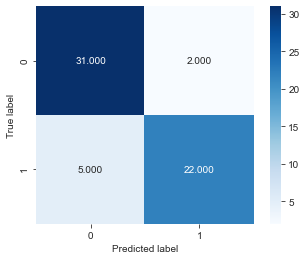

In [85]:
classifier = RandomForestClassifier(bootstrap=False,criterion='entropy',max_features=2,min_samples_leaf=2,n_estimators=400)
classifier.fit(X_train,y_train)
y_predict= classifier.predict(X_test)
print("accuracy_score:",accuracy_score(y_test,y_predict))
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm, annot=True, annot_kws={"size":10}, cmap='Blues', square=True, fmt='.3f')
plt.ylabel('True label')
plt.xlabel('Predicted label')

Saving the best model:

In [86]:
import joblib
joblib.dump(classifier,'classifier.obj')
classifier_from_joblib = joblib.load('classifier.obj')
classifier_from_joblib.predict(X_test)

array([1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0], dtype=int64)